<a href="https://colab.research.google.com/github/MaxGalindo150/Neural-Network-From-Scratch/blob/master/Neural_netwok_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural-network from scratch
In this notebook, I create a neural network from scratch using numpy.

### Necessary packaging

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

### Create the data to train the neural network

In [ ]:
N = 10000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=False,
                        random_state=None
                        )

X, Y = gaussian_quantiles

I have a dataset consisting of 10,000 samples, each accompanied by their respective two features.

In [ ]:
X.shape

(10000, 2)

We add an axis to Y to suit it to the outcome of the neural network.

In [ ]:
Y = Y[:, np.newaxis]

Now we represent the data on a graph where each axis corresponds to one of the two dimensions (X[:,0] and X[:,1]), and the variable Y is represented by a color change in the graph.

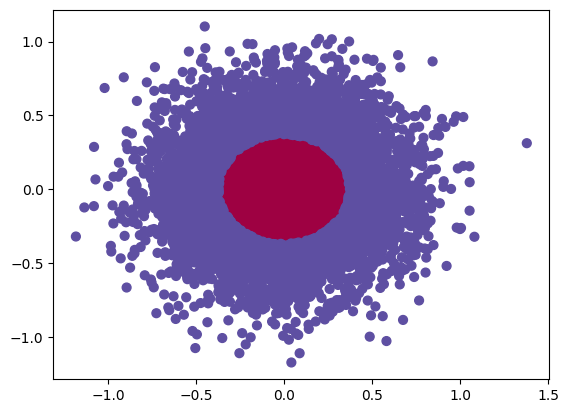

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

The goal is for the neural network to recognize that there is one class in the center of the graph and another class surrounding it.

### Create the activation and loss functions

I utilized the Sigmoid activation function, which squashes the input values between 0 and 1, serving as a non-linear transformation. Additionally, I employed the ReLU (Rectified Linear Unit) activation function, which returns 0 for negative inputs and the input value for positive inputs, effectively introducing non-linearity to the model. And as Loss function I used Mean Squared Error (MSE): It measures the average squared difference between the predicted and actual values.

In [ ]:
#Activation Functions

def sigmoid(x, derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1/(1+np.exp(-x))

def relu(x, derivate=False):
  if derivate:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.maximum(0,x)

# Loss Function
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

### Construction of the neural network structure


In [ ]:
def initialize_parameters_deep(layers_dim):
  parameters ={}
  L = len(layers_dim)

  for l in range(0,L-1):
    parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]))*2 - 1 #Create the weights [-,+]
    parameters['b' + str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]))*2 - 1 #Create the baias [-,+]

  return parameters

Below is an example of a neural network structure. It consists of an input layer with 2 neurons, followed by 2 internal layers with 4 and 8 neurons respectively. Finally, there is an output layer with a single neuron since the objective is to perform a binary classification between two types.

In [ ]:
layers_dim = [2,4,8,1]
params = initialize_parameters_deep(layers_dim)
params

{'W1': array([[ 0.32875292, -0.69448306, -0.92201119, -0.93096674],
        [-0.0337199 , -0.67135568, -0.24989248, -0.34664776]]),
 'b1': array([[ 0.17698825,  0.36683652,  0.40260273,  0.08288928],
        [ 0.31266156,  0.19225732, -0.03370335, -0.1811438 ]]),
 'W2': array([[-0.42668472,  0.40545025, -0.41182186,  0.32326035,  0.17754558,
          0.11937265, -0.03238225,  0.65909489],
        [ 0.39599207, -0.6844047 ,  0.24001558, -0.0668441 ,  0.92132879,
          0.14379498,  0.44884467,  0.94582673],
        [-0.42601919,  0.7195377 , -0.15670347,  0.07869703, -0.89961585,
         -0.95369346,  0.59778663,  0.01949984],
        [-0.64301346,  0.43992903, -0.23968412, -0.77965564, -0.22060414,
          0.00639249, -0.95943618, -0.37896092]]),
 'b2': array([[-0.25013318, -0.11875205,  0.3112713 ,  0.80143241,  0.64536803,
          0.79318522, -0.54294325, -0.60464388],
        [ 0.16133512, -0.88587666, -0.54589333, -0.84515684,  0.83155664,
          0.95183271,  0.28726111

We can observe that each neuron in the network has a set of weights required to connect with the subsequent layer. For instance, the first layer ('W1') consists of two neurons, each having four weights, which are sufficient to establish connections with the next layer comprising four neurons.

It is crucial to note that our input layer contains only two neurons, as our data has two features. This design choice aligns with the number of input dimensions in our dataset.

### Time to train the model

In [ ]:
def train(x_data, lr, params, training=True):

  #First layer forward
  params['A0'] = x_data #Input value

  params['Z1'] = np.matmul(params['A0'], params['W1'] + params['b1']) #The inner product X*(W1 + b1)
  params['A1'] = relu(params['Z1']) #Apply the activation function

  #Second layer forward
  params['Z2'] = np.matmul(params['A1'], params['W2'] + params['b2']) #The inner product X*(W2 + b2)
  params['A2'] = relu(params['Z2']) #Apply the activation function


  #Third layer forward
  params['Z3'] = np.matmul(params['A2'], params['W3'] + params['b3']) #The inner product X*(W3 + b3)
  params['A3'] = relu(params['Z3']) #In this particular case, we use the sigmoid function. The choice of the sigmoid function is based on its suitability for handling probabilities, as it squashes the output values between 0 and 1, allowing for a more intuitive interpretation as probabilities.

  #Output forward
  output = params['A3']
  if training:
    #Backpropagation
    #In order to improve the predictions, backpropagation is applied

    #Third layer backpropagation
    params['dZ3'] = mse(Y, output, derivate=True)*sigmoid(output, derivate=True)
    params['dW3'] = np.matmul(params['A2'].T, params['dZ3']) 

    #Second layer backpropagation
    params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T)*relu(params['A2'], derivate=True)
    params['dW2'] = np.matmul(params['A1'].T, params['dZ2']) 

    #First layer backpropagation
    params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T)*relu(params['A1'], derivate=True)
    params['dW1'] = np.matmul(params['A0'].T, params['dZ1']) 

    #Graadient Descent
    #Now that we have spread the error through our neural network we must update the weights
    #Third layer GD
    params['W3'] = params['W3'] - params['dW3']*lr
    params['b3'] = params['b3'] - (np.mean(params['dW3'], axis=0, keepdims=True))*lr

    #Second layer GD
    params['W2'] = params['W2'] - params['dW2']*lr
    params['b2'] = params['b2'] - (np.mean(params['dW2'], axis=0, keepdims=True))*lr

    #First layer GD
    params['W1'] = params['W1'] - params['dW1']*lr
    params['b1'] = params['b1'] - (np.mean(params['dW1'], axis=0, keepdims=True))*lr
  
  return output


### Analysis
Now that we create the training function, we can analyze the performance of our neural network.

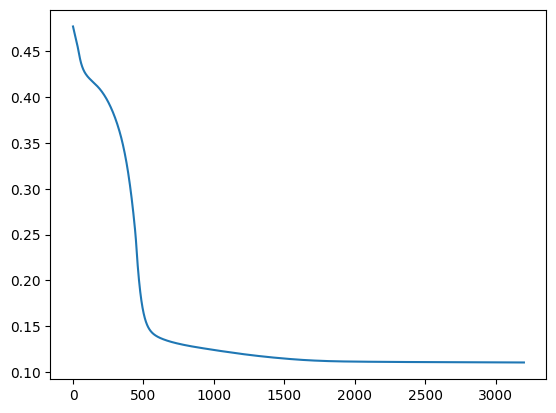

In [ ]:
layers_dim = [2,4,8,1]
params = initialize_parameters_deep(layers_dim)
errors = []

for _ in range(80000):
  output = train(X, 0.000001, params)
  if _ % 25 == 0:
    errors.append(mse(Y, output))

plt.plot(errors)

Now let’s create unclassified data to corrode that the neural network is able to classify the data.

In [ ]:
data_test = (np.random.rand(1000,2)*2) - 1
y = train(data_test,0.0001,params, training=False) #training is False is false because we only want the neural network to classify the data

Since the predictions range from 0 to 1, we can normalize the values of "y"

In [ ]:
y = np.where(y >= 0.5,1,0)

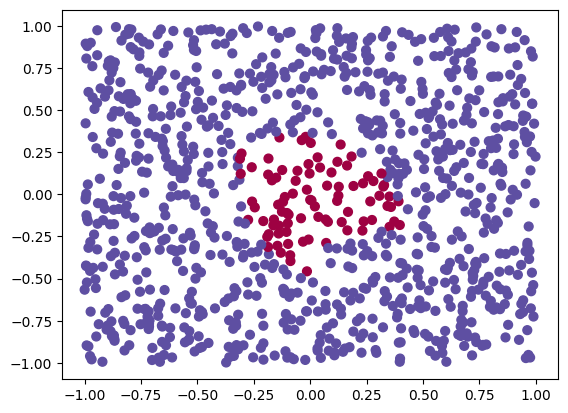

In [ ]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)

Upon training, the neural network successfully learned to recognize the underlying pattern in the data. It was able to distinguish between the class located at the center and the surrounding class. This indicates that the network effectively captured the discriminative features necessary to differentiate between the two classes.